In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
yelp = pd.read_csv('yelp.csv')

In [4]:
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0  
3  uZetl9T0NcROGOyFfughhg     1       2      0  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0

In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
yelp.describe()

stars          cool        useful         funny
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       3.777500      0.876800      1.409300      0.701300
std        1.214636      2.067861      2.336647      1.907942
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000      0.000000      0.000000
50%        4.000000      0.000000      1.000000      0.000000
75%        5.000000      1.000000      2.000000      1.000000
max        5.000000     77.000000     76.000000     57.000000

In [7]:
yelp['length'] = yelp['text'].apply(len)

In [8]:
yelp.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  length  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0     895  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0    1349  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0      76  
3  uZetl9T0NcROGOyFfughhg     1       2      0     423  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0     471

In [9]:
g = sns.FacetGrid(yelp, col='stars')
g=g.map(plt.hist, 'length', bins=30)

In [10]:
ax = sns.boxplot(x='stars', y='length', data=yelp)

In [11]:
sns.countplot(data=yelp, x='stars')

In [41]:
cool = yelp.groupby('stars')['cool'].mean()
useful = yelp.groupby('stars')['useful'].mean()
funny = yelp.groupby('stars')['funny'].mean()
length = yelp.groupby('stars')['length'].mean()
yelp_groupby_mean = pd.DataFrame({'cool': cool, 'useful': useful, 'funny': funny, 'length': length})


In [43]:
#Faster way to do it
stars = yelp.groupby('stars').mean()
stars

cool    useful     funny      length
stars                                          
1      0.576769  1.604806  1.056075  830.244326
2      0.719525  1.563107  0.875944  846.249191
3      0.788501  1.306639  0.694730  762.325120
4      0.954623  1.395916  0.670448  716.493193
5      0.944261  1.381780  0.608631  627.976925

In [13]:
yelp_groupby_mean

cool    useful     funny      length
stars                                          
1      0.576769  1.604806  1.056075  830.244326
2      0.719525  1.563107  0.875944  846.249191
3      0.788501  1.306639  0.694730  762.325120
4      0.954623  1.395916  0.670448  716.493193
5      0.944261  1.381780  0.608631  627.976925

In [14]:
yelp_groupby_mean_corr = yelp_groupby_mean.corr()

In [15]:
yelp_groupby_mean_corr

cool    useful     funny    length
cool    1.000000 -0.743329 -0.944939 -0.856995
useful -0.743329  1.000000  0.894506  0.698743
funny  -0.944939  0.894506  1.000000  0.842585
length -0.856995  0.698743  0.842585  1.000000

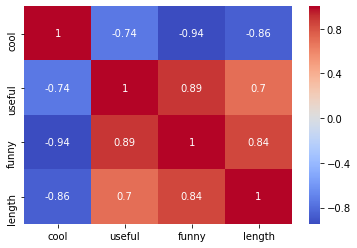

In [16]:
ax = sns.heatmap(yelp_groupby_mean_corr, annot=True, cmap='coolwarm')

In [17]:
yelp_class = yelp[(yelp['stars'] == 5) | (yelp['stars'] == 1)]

In [18]:
yelp_class.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
6  zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   
6  Drop what you're doing and drive here. After I...  review   

                  user_id  cool  useful  funny  length  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0     895  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0    1349  
3  uZetl9T0NcROGOyFfughhg     1       2      0     423  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0     471  
6  wFweIWhv2fREZV_dYkz_1g     7       7      4    1571

In [19]:
X=yelp_class['text']
y=yelp_class['stars']

In [20]:
X

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
6       Drop what you're doing and drive here. After I...
9       Nobuo shows his unique talents with everything...
10      The oldish man who owns the store is as sweet ...
11      Wonderful Vietnamese sandwich shoppe. Their ba...
12      They have a limited time thing going on right ...
17      okay this is the best place EVER! i grew up sh...
21      This place shouldn't even be reviewed - becaus...
22      first time my friend and I went there... it wa...
23      U can go there n check the car out. If u wanna...
24      I love this place! I have been coming here for...
26      I love love LOVE this place. My boss (who is i...
30      Disclaimer: Like many of you, I am a sucker fo...
31      Disgusting!  Had a Groupon so my daughter and ...
32      Never 

In [21]:
y

0       5
1       5
3       5
4       5
6       5
9       5
10      5
11      5
12      5
17      5
21      5
22      5
23      1
24      5
26      5
30      5
31      1
32      5
35      1
46      5
51      5
54      5
59      5
61      1
64      1
65      1
66      5
67      5
69      5
71      1
       ..
9941    5
9942    5
9943    5
9945    5
9947    5
9951    5
9953    1
9956    5
9957    5
9959    5
9965    5
9966    5
9969    5
9970    5
9971    5
9973    5
9975    5
9977    5
9978    5
9979    5
9980    5
9981    5
9984    1
9987    1
9989    5
9990    5
9991    5
9992    5
9994    5
9999    5
Name: stars, Length: 4086, dtype: int64

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv = CountVectorizer()

In [24]:
X=cv.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split


In [26]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=101)

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [28]:
nb = MultinomialNB()

In [29]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
predictions = nb.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



[[159  69]
 [ 22 976]]


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [36]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [37]:
msg_train,msg_test,label_train,label_test = train_test_split(yelp_class['text'], yelp_class['stars'], test_size=0.3)

In [38]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [39]:
predictions2 = pipeline.predict(msg_test)

In [40]:
print(classification_report(label_test, predictions2))
print('\n')
print(confusion_matrix(label_test, predictions2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       222
           5       0.82      1.00      0.90      1004

    accuracy                           0.82      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.67      0.82      0.74      1226



[[   0  222]
 [   0 1004]]


d:\Profiles\qdarrigade\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#To explore further, it is possible to use a custom text analyzer with count vectorizer as it is done in the lecture session.
#It is also possible to use a different classifier or remove the tfidf step